# Figure 3C: Comparing West vs. East

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
import cv2

In [2]:
color_df = pd.read_csv('../filtered_labeled_data.csv')
color_df

,image_idx,hex,rgb,hsl,lab,gbifID,identifier,latitude,longitude
0,0,#eeddf6,"(238, 221, 246)","(0.7799999999999999, 0.5813953488372098, 0.915...","(230, 138, 118)",923911394,https://inaturalist-open-data.s3.amazonaws.com...,48.826305,-102.092171
1,2,#c7aac4,"(199, 170, 196)","(0.8505747126436781, 0.20567375886524827, 0.72...","(186, 143, 119)",923910407,https://inaturalist-open-data.s3.amazonaws.com...,43.613086,-73.057076
2,4,#bb9ed5,"(187, 158, 213)","(0.7545454545454545, 0.3956834532374102, 0.727...","(177, 149, 104)",899970365,https://inaturalist-open-data.s3.amazonaws.com...,43.066871,-87.890565
3,7,#9175a0,"(145, 117, 160)","(0.7751937984496124, 0.18454935622317595, 0.54...","(136, 147, 109)",891778924,https://inaturalist-open-data.s3.amazonaws.com...,42.140556,-87.831643
4,9,#b796e2,"(183, 150, 226)","(0.7390350877192983, 0.5671641791044776, 0.737...","(172, 155, 94)",891760719,https://inaturalist-open-data.s3.amazonaws.com...,38.679240,-97.990035
...,...,...,...,...,...,...,...,...,...
20623,41059,#b3a5d8,"(179, 165, 216)","(0.7124183006535948, 0.39534883720930225, 0.74...","(180, 143, 104)",1024218211,https://inaturalist-open-data.s3.amazonaws.com...,41.569419,-88.150552
20624,41060,#ae66b9,"(174, 102, 185)","(0.8112449799196787, 0.3721973094170403, 0.562...","(138, 170, 96)",1024202810,https://inaturalist-open-data.s3.amazonaws.com...,45.057871,-87.168277
20625,41061,#a88dc4,"(168, 141, 196)","(0.7484848484848484, 0.3179190751445088, 0.660...","(160, 149, 103)",1024200169,https://inaturalist-open-data.s3.amazonaws.com...,42.921738,-88.026752
20626,41063,#baada2,"(186, 173, 162)","(0.076388888888889, 0.14814814814814817, 0.682...","(182, 131, 135)",1024198670,https://inaturalist-open-data.s3.amazonaws.com...,40.791723,-80.492498


In [3]:
color_df_reduced = (
    color_df.groupby("gbifID", sort=False, group_keys=False)
    .apply(lambda x: x.sample(1))
    .reset_index(drop=True)
)
color_df_reduced

/var/folders/qh/c7rwx84921n2kznn09zb2pnh0000gn/T/ipykernel_54260/411184798.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(1))


,image_idx,hex,rgb,hsl,lab,gbifID,identifier,latitude,longitude
0,0,#eeddf6,"(238, 221, 246)","(0.7799999999999999, 0.5813953488372098, 0.915...","(230, 138, 118)",923911394,https://inaturalist-open-data.s3.amazonaws.com...,48.826305,-102.092171
1,2,#c7aac4,"(199, 170, 196)","(0.8505747126436781, 0.20567375886524827, 0.72...","(186, 143, 119)",923910407,https://inaturalist-open-data.s3.amazonaws.com...,43.613086,-73.057076
2,4,#bb9ed5,"(187, 158, 213)","(0.7545454545454545, 0.3956834532374102, 0.727...","(177, 149, 104)",899970365,https://inaturalist-open-data.s3.amazonaws.com...,43.066871,-87.890565
3,7,#9175a0,"(145, 117, 160)","(0.7751937984496124, 0.18454935622317595, 0.54...","(136, 147, 109)",891778924,https://inaturalist-open-data.s3.amazonaws.com...,42.140556,-87.831643
4,9,#b796e2,"(183, 150, 226)","(0.7390350877192983, 0.5671641791044776, 0.737...","(172, 155, 94)",891760719,https://inaturalist-open-data.s3.amazonaws.com...,38.679240,-97.990035
...,...,...,...,...,...,...,...,...,...
16582,41059,#b3a5d8,"(179, 165, 216)","(0.7124183006535948, 0.39534883720930225, 0.74...","(180, 143, 104)",1024218211,https://inaturalist-open-data.s3.amazonaws.com...,41.569419,-88.150552
16583,41060,#ae66b9,"(174, 102, 185)","(0.8112449799196787, 0.3721973094170403, 0.562...","(138, 170, 96)",1024202810,https://inaturalist-open-data.s3.amazonaws.com...,45.057871,-87.168277
16584,41061,#a88dc4,"(168, 141, 196)","(0.7484848484848484, 0.3179190751445088, 0.660...","(160, 149, 103)",1024200169,https://inaturalist-open-data.s3.amazonaws.com...,42.921738,-88.026752
16585,41063,#baada2,"(186, 173, 162)","(0.076388888888889, 0.14814814814814817, 0.682...","(182, 131, 135)",1024198670,https://inaturalist-open-data.s3.amazonaws.com...,40.791723,-80.492498


## calculate darkness from hsl:

In [4]:
# in hsl, where "l" is lightness. 
# we can then subtract l from 1 for "intensity" = darkness
darkness = []
for hsl in color_df_reduced.hsl:
    # parse the text hsl value into a list of 3 str vals
    # (function generating this val is in notebook 5)
    h,s,l = hsl.strip('()').split(',')
    darkness.append(1-float(l))

In [5]:
color_df_reduced['darkness'] = darkness
color_df_reduced

,image_idx,hex,rgb,hsl,lab,gbifID,identifier,latitude,longitude,darkness
0,0,#eeddf6,"(238, 221, 246)","(0.7799999999999999, 0.5813953488372098, 0.915...","(230, 138, 118)",923911394,https://inaturalist-open-data.s3.amazonaws.com...,48.826305,-102.092171,0.084314
1,2,#c7aac4,"(199, 170, 196)","(0.8505747126436781, 0.20567375886524827, 0.72...","(186, 143, 119)",923910407,https://inaturalist-open-data.s3.amazonaws.com...,43.613086,-73.057076,0.276471
2,4,#bb9ed5,"(187, 158, 213)","(0.7545454545454545, 0.3956834532374102, 0.727...","(177, 149, 104)",899970365,https://inaturalist-open-data.s3.amazonaws.com...,43.066871,-87.890565,0.272549
3,7,#9175a0,"(145, 117, 160)","(0.7751937984496124, 0.18454935622317595, 0.54...","(136, 147, 109)",891778924,https://inaturalist-open-data.s3.amazonaws.com...,42.140556,-87.831643,0.456863
4,9,#b796e2,"(183, 150, 226)","(0.7390350877192983, 0.5671641791044776, 0.737...","(172, 155, 94)",891760719,https://inaturalist-open-data.s3.amazonaws.com...,38.679240,-97.990035,0.262745
...,...,...,...,...,...,...,...,...,...,...
16582,41059,#b3a5d8,"(179, 165, 216)","(0.7124183006535948, 0.39534883720930225, 0.74...","(180, 143, 104)",1024218211,https://inaturalist-open-data.s3.amazonaws.com...,41.569419,-88.150552,0.252941
16583,41060,#ae66b9,"(174, 102, 185)","(0.8112449799196787, 0.3721973094170403, 0.562...","(138, 170, 96)",1024202810,https://inaturalist-open-data.s3.amazonaws.com...,45.057871,-87.168277,0.437255
16584,41061,#a88dc4,"(168, 141, 196)","(0.7484848484848484, 0.3179190751445088, 0.660...","(160, 149, 103)",1024200169,https://inaturalist-open-data.s3.amazonaws.com...,42.921738,-88.026752,0.339216
16585,41063,#baada2,"(186, 173, 162)","(0.076388888888889, 0.14814814814814817, 0.682...","(182, 131, 135)",1024198670,https://inaturalist-open-data.s3.amazonaws.com...,40.791723,-80.492498,0.317647


### add "region" column

In [6]:
# set region split longitude
focal_lon = -100 
# make a "region" column based on longitude
color_df_reduced['region'] = color_df_reduced['longitude'].apply(lambda x: 'East' if x > focal_lon else 'West')
color_df_reduced

,image_idx,hex,rgb,hsl,lab,gbifID,identifier,latitude,longitude,darkness,region
0,0,#eeddf6,"(238, 221, 246)","(0.7799999999999999, 0.5813953488372098, 0.915...","(230, 138, 118)",923911394,https://inaturalist-open-data.s3.amazonaws.com...,48.826305,-102.092171,0.084314,West
1,2,#c7aac4,"(199, 170, 196)","(0.8505747126436781, 0.20567375886524827, 0.72...","(186, 143, 119)",923910407,https://inaturalist-open-data.s3.amazonaws.com...,43.613086,-73.057076,0.276471,East
2,4,#bb9ed5,"(187, 158, 213)","(0.7545454545454545, 0.3956834532374102, 0.727...","(177, 149, 104)",899970365,https://inaturalist-open-data.s3.amazonaws.com...,43.066871,-87.890565,0.272549,East
3,7,#9175a0,"(145, 117, 160)","(0.7751937984496124, 0.18454935622317595, 0.54...","(136, 147, 109)",891778924,https://inaturalist-open-data.s3.amazonaws.com...,42.140556,-87.831643,0.456863,East
4,9,#b796e2,"(183, 150, 226)","(0.7390350877192983, 0.5671641791044776, 0.737...","(172, 155, 94)",891760719,https://inaturalist-open-data.s3.amazonaws.com...,38.679240,-97.990035,0.262745,East
...,...,...,...,...,...,...,...,...,...,...,...
16582,41059,#b3a5d8,"(179, 165, 216)","(0.7124183006535948, 0.39534883720930225, 0.74...","(180, 143, 104)",1024218211,https://inaturalist-open-data.s3.amazonaws.com...,41.569419,-88.150552,0.252941,East
16583,41060,#ae66b9,"(174, 102, 185)","(0.8112449799196787, 0.3721973094170403, 0.562...","(138, 170, 96)",1024202810,https://inaturalist-open-data.s3.amazonaws.com...,45.057871,-87.168277,0.437255,East
16584,41061,#a88dc4,"(168, 141, 196)","(0.7484848484848484, 0.3179190751445088, 0.660...","(160, 149, 103)",1024200169,https://inaturalist-open-data.s3.amazonaws.com...,42.921738,-88.026752,0.339216,East
16585,41063,#baada2,"(186, 173, 162)","(0.076388888888889, 0.14814814814814817, 0.682...","(182, 131, 135)",1024198670,https://inaturalist-open-data.s3.amazonaws.com...,40.791723,-80.492498,0.317647,East


# compare values in different regions

#### first get median color for each region

In [7]:
# conversion functions (from notebook 5)
def rgb_to_hex(rgb):
    # rgb should be a tuple like (R, G, B)
    return '#{:02x}{:02x}{:02x}'.format(*rgb)
def lab_to_rgb(lab):
    """convert (L,a,b) in OpenCV's Lab to (r,g,b) in [0,255]"""
    arr = np.array([[lab]], dtype=np.uint8)
    rgb = cv2.cvtColor(arr, cv2.COLOR_LAB2RGB)[0][0]
    return tuple(int(x) for x in rgb)

#### west median

In [8]:
west = list(color_df_reduced[color_df_reduced.region.eq('West')].lab)
west = [i.strip('()').split(', ') for i in west]
west = [[float(q) for q in i] for i in west]

In [9]:
median_lab = np.median(west,axis=0)
median_lab

array([164., 161., 100.])

In [10]:
west_median_color = rgb_to_hex(lab_to_rgb(median_lab))
west_median_color

'#bf88ce'

#### east median

In [11]:
east = list(color_df_reduced[color_df_reduced.region.eq('East')].lab)
east = [i.strip('()').split(', ') for i in east]
east = [[float(q) for q in i] for i in east]

In [12]:
median_lab = np.median(east,axis=0)
median_lab

array([195., 145., 112.])

In [13]:
east_median_color = rgb_to_hex(lab_to_rgb(median_lab))
east_median_color

'#cfb3da'

# Now make box-and-whisker plots

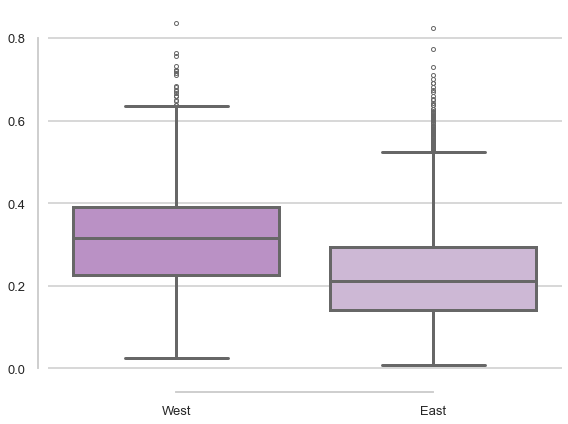

t-statistic: -36.375
p-value: 0.00000


In [14]:
# make nice figure aesthetics
sns.set(style='whitegrid', context='talk', font_scale=1.2)

# set up plot
fig, ax = plt.subplots(figsize=(8, 6))

# specify boxplot params
sns.boxplot(
    x='region',
    y='darkness',
    data=color_df_reduced,
    hue='region',
    legend=False,
    palette=[west_median_color, east_median_color],  # two shades of purple. could be the same, no preference here.
    linewidth=3,
    fliersize=4,
    order=['West', 'East'],
    hue_order=['West', 'East'],
    ax=ax
)

# no labels/titles
#ax.set_title('"Darkness" by Region (West vs. East)', fontsize=16, fontweight='bold', pad=15)
ax.set_xlabel(None)
ax.set_ylabel(None)

# tick parameters
ax.tick_params(axis='both', which='major', labelsize=13)

# this helps push the horiz bars away from the y
sns.despine(offset=10, trim=True)

# let's see it!
plt.tight_layout()
plt.savefig(f"../figures/figure3/box_whisker_darkness.pdf", dpi=300, bbox_inches="tight")
plt.show()

# t-test as well
west_darkness = color_df_reduced[color_df_reduced['region'] == 'West']['darkness']
east_darkness = color_df_reduced[color_df_reduced['region'] == 'East']['darkness']
t_stat, p_value = ttest_ind(east_darkness, west_darkness, equal_var=False)

# t-test results
print(f"t-statistic: {t_stat:.3f}")
print(f"p-value: {p_value:.5f}")

# what if we subsample the data?

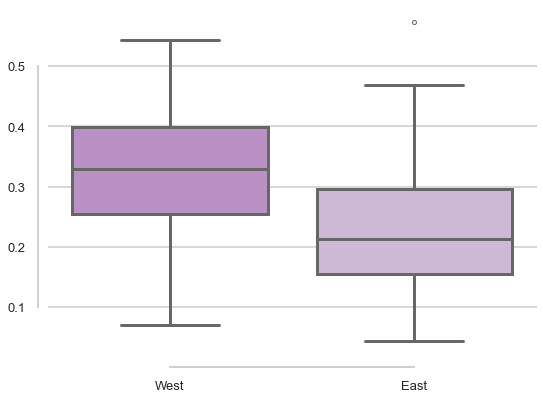

t-statistic: -5.198
p-value: 0.00000


In [15]:
ssamp = color_df_reduced.sample(200)

# make nice figure aesthetics
sns.set(style='whitegrid', context='talk', font_scale=1.2)

# set up plot
fig, ax = plt.subplots(figsize=(8, 6))

# specify boxplot params
sns.boxplot(
    x='region',
    y='darkness',
    data=ssamp,
    hue='region',
    legend=False,
    palette=[west_median_color, east_median_color],  # two shades of purple. could be the same, no preference here.
    linewidth=3,
    fliersize=4,
    order=['West', 'East'],
    hue_order=['West', 'East'],
    ax=ax
)

# no labels/titles
#ax.set_title('"Darkness" by Region (West vs. East)', fontsize=16, fontweight='bold', pad=15)
ax.set_xlabel(None)
ax.set_ylabel(None)

# tick parameters
ax.tick_params(axis='both', which='major', labelsize=13)

# this helps push the horiz bars away from the y
sns.despine(offset=10, trim=True)

# let's see it!
plt.tight_layout()
plt.show()

# t-test as well
west_darkness = ssamp[ssamp['region'] == 'West']['darkness']
east_darkness = ssamp[ssamp['region'] == 'East']['darkness']
t_stat, p_value = ttest_ind(east_darkness, west_darkness, equal_var=False)

# t-test results
print(f"t-statistic: {t_stat:.3f}")
print(f"p-value: {p_value:.5f}")